<a href="https://colab.research.google.com/github/c-huiya/Comparison-between-Deep-Learning-Models/blob/main/230571H_project_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Applied Deep Learning/project
!ls

/content/drive/My Drive/Applied Deep Learning/project
current_230571H_project_ADL.ipynb  dataset_transport


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
import keras.utils as utils
from keras import models, layers, regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

from PIL import Image

In [ ]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
image_size = (IMG_HEIGHT, IMG_WIDTH)
batch_size = 32
epochs = 100

In [ ]:
base_dir = './dataset_transport'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_truck = os.path.join(train_dir, 'truck')
train_automobile = os.path.join(train_dir, 'automobile')
train_airplane = os.path.join(train_dir, 'airplane')

test_truck = os.path.join(test_dir, 'truck')
test_automobile = os.path.join(test_dir, 'automobile')
test_airplane = os.path.join(test_dir, 'airplane')

In [ ]:
# Define class labels based on folder names
class_names = ['truck', 'automobile', 'airplane']
class_dirs = {cls: os.path.join(train_dir, cls) for cls in class_names}

In [ ]:
import cv2
def upscale_images(images, target_size=(256, 256)):
    return np.array([cv2.resize(img, target_size, interpolation=cv2.INTER_CUBIC) for img in images])

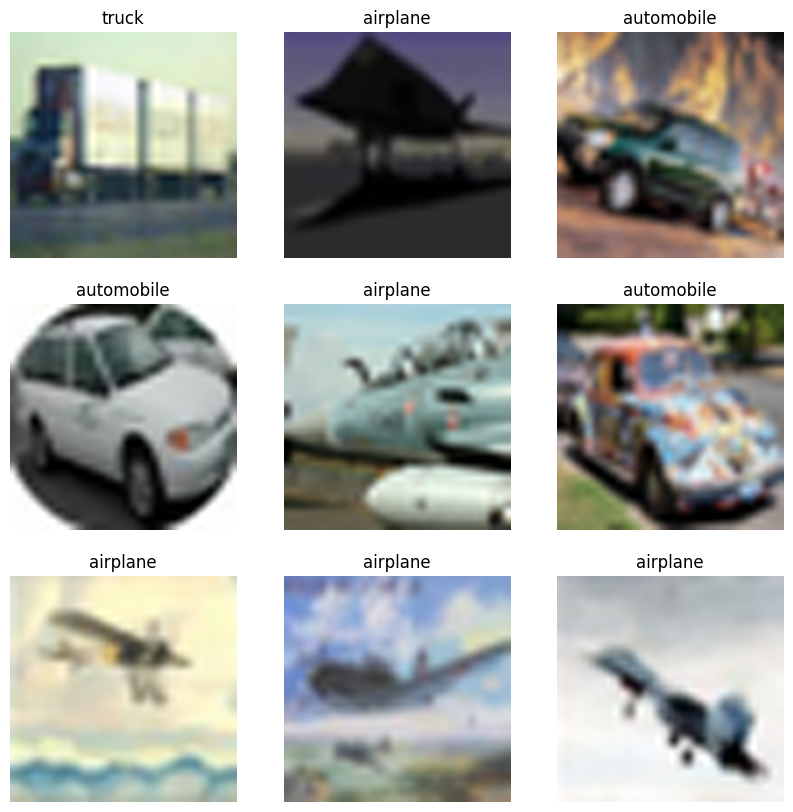

In [ ]:
import random
def show_random_images(class_dirs, num_images=9):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.flatten()

    for ax in axes:
        # Pick a random class
        class_name = random.choice(class_names)
        class_path = class_dirs[class_name]

        # Pick a random image from the class folder
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)

        # Open and display the image
        img = Image.open(img_path)
        img = np.array(img)
        img = upscale_images([img])[0]
        ax.imshow(img)
        ax.set_title(class_name)
        ax.axis('off')

    plt.show()

# Call the function to display images
show_random_images(class_dirs)


In [ ]:
import glob
# update train_dir with upscaled images

# Get all image file paths
image_paths = glob.glob(os.path.join(train_dir, "**", "*.jpg"), recursive=True)  # Adjust extension if needed

for img_path in image_paths:
    img = cv2.imread(img_path)  # Load image
    if img is None:
        print(f"Skipping {img_path} (could not load)")
        continue

    # Assuming 'upscale_images' function is defined elsewhere
    upscaled_img = upscale_images([img])[0]  # Upscale the image
    cv2.imwrite(img_path, upscaled_img)  # Overwrite the original image

print("All images have been upscaled and updated successfully!")

All images have been upscaled and updated successfully!


In [ ]:
# data augmentation for train images
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'categorical')

test_data_gen = test_image_generator.flow_from_directory(batch_size = batch_size,
                                                         directory = test_dir,
                                                         shuffle = False,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode = 'categorical')

Found 6000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


# Regularization Techniques

In [ ]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)

In [ ]:
# Learning Rate Reduction
lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=2,
    factor=0.5,
    min_lr=0.00005)

# CNN model

In [ ]:
CNN_model_230571H = models.Sequential()

CNN_model_230571H.add(layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.00001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
CNN_model_230571H.add(layers.BatchNormalization())
CNN_model_230571H.add(layers.MaxPooling2D(2))

CNN_model_230571H.add(layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
CNN_model_230571H.add(layers.BatchNormalization())
CNN_model_230571H.add(layers.MaxPooling2D(2))

CNN_model_230571H.add(layers.Conv2D(128, 3, padding='same', activation='tanh', kernel_regularizer=regularizers.l2(0.00001)))
CNN_model_230571H.add(layers.BatchNormalization())
CNN_model_230571H.add(layers.MaxPooling2D(2))

CNN_model_230571H.add(layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
CNN_model_230571H.add(layers.BatchNormalization())
CNN_model_230571H.add(layers.MaxPooling2D(2))

CNN_model_230571H.add(layers.Flatten())
CNN_model_230571H.add(layers.BatchNormalization())
CNN_model_230571H.add(layers.Dense(128, activation='relu'))
CNN_model_230571H.add(layers.Dropout(0.15))
CNN_model_230571H.add(layers.Dense(32, activation='relu'))
CNN_model_230571H.add(layers.Dropout(0.15))
CNN_model_230571H.add(layers.Dense(3, activation='softmax'))
print(CNN_model_230571H.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 65536)               │         262,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              

 Total params: 9,045,443 (34.51 MB)

 Trainable params: 8,913,411 (34.00 MB)

 Non-trainable params: 132,032 (515.75 KB)

None


In [ ]:
optimizer = Adam(learning_rate=0.0003)
CNN_model_230571H.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = CNN_model_230571H.fit(train_data_gen,
                    epochs=epochs,
                    validation_data=test_data_gen,
                    callbacks=[early_stopping, lr_reduction])

print(f"Training stopped at epoch: {early_stopping.stopped_epoch}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4930s 26s/step - accuracy: 0.5209 - loss: 2.0929 - val_accuracy: 0.3333 - val_loss: 3.5223 - learning_rate: 3.0000e-04
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 491ms/step - accuracy: 0.5156 - loss: 1.2067 - val_accuracy: 0.3347 - val_loss: 1.4500 - learning_rate: 3.0000e-04
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 484ms/step - accuracy: 0.5364 - loss: 1.0352 - val_accuracy: 0.5820 - val_loss: 0.8599 - learning_rate: 3.0000e-04
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 488ms/step - accuracy: 0.5491 - loss: 0.9777 - val_accuracy: 0.6720 - val_loss: 0.7646 - learning_rate: 3.0000e-04
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 486ms/step - accuracy: 0.5818 - loss: 0.9192 - val_accuracy: 0.6727 - val_loss: 0.7782 - learning_rate: 3.0000e-04
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 485ms/step - accuracy: 0.6105 - loss: 0.8469 - val_accuracy: 0.6807 - val_loss: 0.7368 - learning_rate: 3.0000e-04
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━

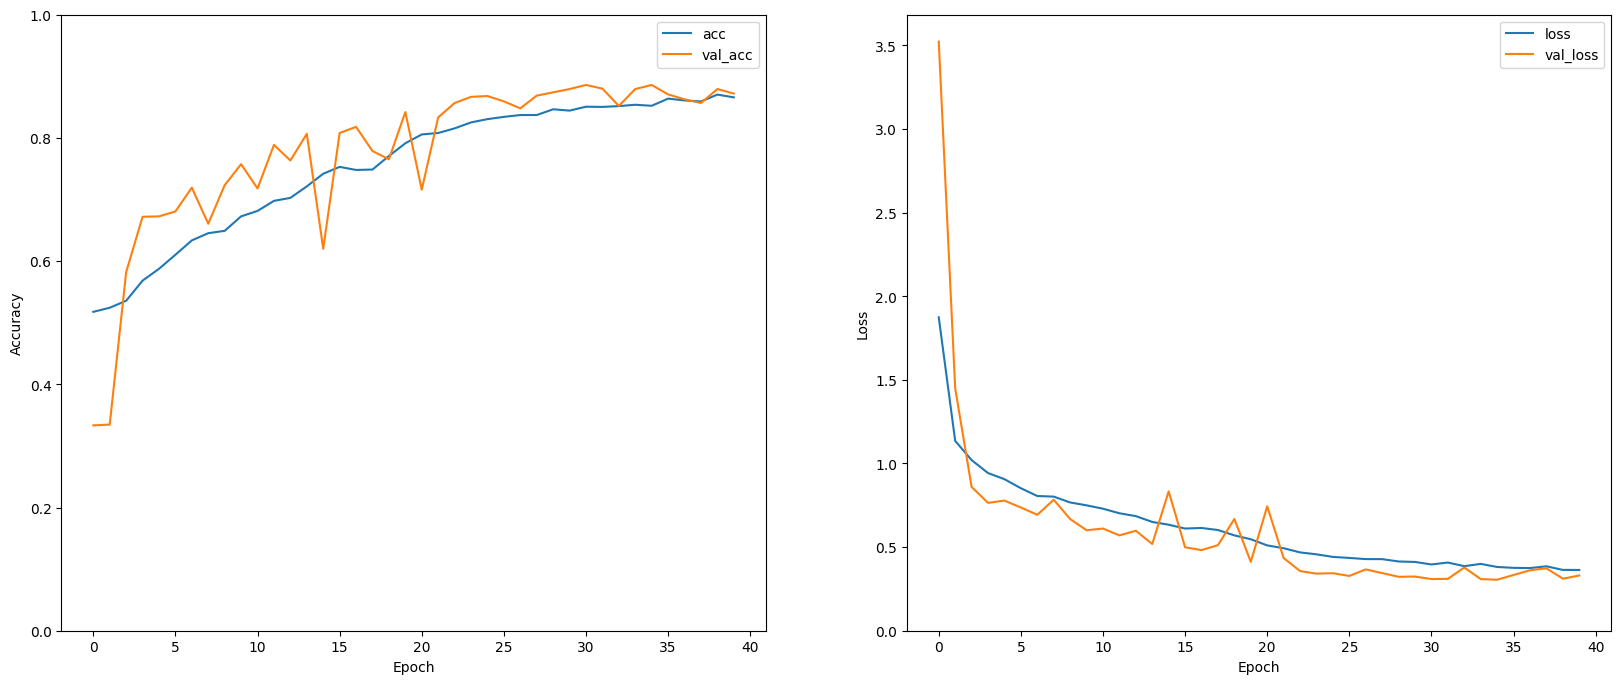

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(bottom=0)


plt.show()

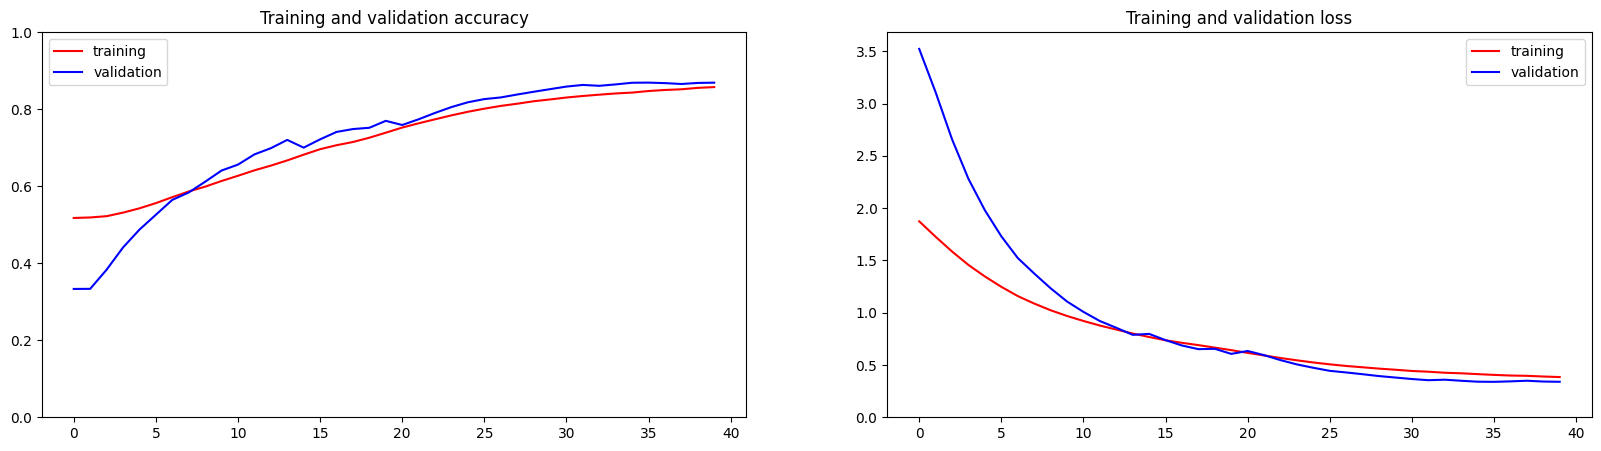

In [ ]:
# Function to apply Exponential Moving Average smoothing to check convergence
def exponential_moving_average(values, alpha=0.2):
    ema = []
    ema.append(values[0])  # Initialize with first value
    for i in range(1, len(values)):
        ema.append(alpha * values[i] + (1 - alpha) * ema[-1])
    return np.array(ema)

# Retrieve a list of accuracy results on training and test datasets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

# Retrieve a list of loss results on training and test datasets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Apply Exponential Moving Average smoothing
alpha = 0.2  # Adjust as needed
smooth_acc = exponential_moving_average(acc, alpha)
smooth_val_acc = exponential_moving_average(val_acc, alpha)
smooth_loss = exponential_moving_average(loss, alpha)
smooth_val_loss = exponential_moving_average(val_loss, alpha)

# Size of subplot images
plt.figure(figsize=(20,5))

# Plot training and validation accuracy per epoch
plt.subplot(121)
plt.plot(epochs, smooth_acc, 'r', label='training')
plt.plot(epochs, smooth_val_acc, 'b', label='validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim(0,1)

# Plot training and validation loss per epoch
plt.subplot(122)
plt.plot(epochs, smooth_loss, 'r', label='training')
plt.plot(epochs, smooth_val_loss, 'b', label='validation')
plt.title('Training and validation loss')
plt.legend()
plt.ylim(bottom=0)


plt.show()


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
import numpy
y_pred = CNN_model_230571H.predict(test_data_gen)
y_pred = numpy.argmax(y_pred, axis=1)
print('Classification Report')
print(classification_report(test_data_gen.classes, y_pred, target_names=class_names))

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step
Classification Report
              precision    recall  f1-score   support

       truck       0.87      0.93      0.90       500
  automobile       0.94      0.83      0.88       500
    airplane       0.85      0.89      0.87       500

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step


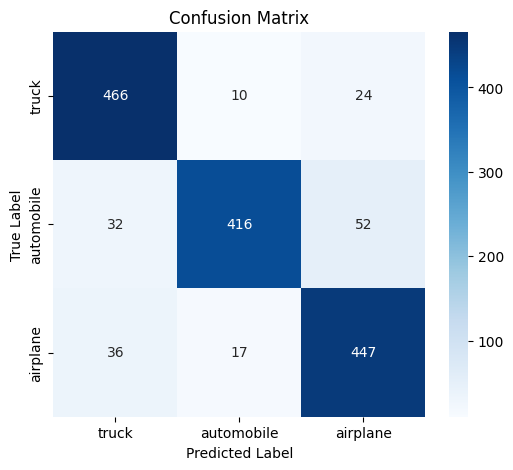

In [ ]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example data: Actual and Predicted Labels
y_true = test_data_gen.classes
y_pred = np.argmax(CNN_model_230571H.predict(test_data_gen), axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from keras.preprocessing import image
def load_image(img_path, show=False):

  img = image.load_img(img_path, target_size=image_size)
  img_tensor = image.img_to_array(img)                 # (height, width, channels)
  img_tensor = np.expand_dims(img_tensor, axis=0)      # (1, height, width, channels), add a dimension because model expects shape=(batch_size, height, width, channels)
  img_tensor /= 255.                                   # imshow expects values in the range [0,1]

  if show:
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

  return img_tensor

In [ ]:
import glob
import os

test_dir = [
'./dataset_transport/test/truck',
'./dataset_transport/test/automobile',
'./dataset_transport/test/airplane'
]



# test_dir is currently a list of strings,
# We need to iterate through each directory and get the files
list_of_files = []
for dir_path in test_dir:
  # Use glob to find files in each directory, ensuring the pattern matches your file extensions
  list_of_files.extend(glob.glob(os.path.join(dir_path, '*.png')))

print(len(list_of_files))
print(test_dir)

1500
['./dataset_transport/test/truck', './dataset_transport/test/automobile', './dataset_transport/test/airplane']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1
prediction= automobile


<ipython-input-51-1461d78a37c7>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_number = int(np.random.randint(0, len(list_of_files), size=1))


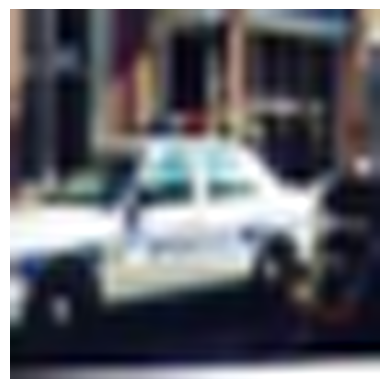

In [ ]:
# randomly choose a picture to test model

img_number = int(np.random.randint(0, len(list_of_files), size=1))
test_image = list_of_files[img_number]

new_image = load_image(test_image)

pred = CNN_model_230571H.predict(new_image)
print(np.argmax(pred[0]))
prediction_result = class_names[np.argmax(pred[0])]
print('prediction=', prediction_result)

img = image.load_img(test_image)  # Load without resizing
img_array = np.array(img)
# Upscale to a larger size, e.g., double the dimensions
upscaled_img = upscale_images([img_array], target_size=(512, 512))[0]

plt.figsize = (10, 10)
plt.imshow(upscaled_img)  # Display the upscaled image
plt.axis('off')
plt.show()

##Summary of CNN model




This 19-layer architecture CNN model leverages on several techniques to achieve optimal model performance.  

It is trained using the Adam optimizer (learning rate 0.0003), incorporating learning rate reduction for fine-tuning.


Regularization against overfitting is implemented through L2 regularization (0.00001) and dropout (0.15).  


Data augmentation, including random rotations (30 degrees), shifts (width/height: 0.2), shear (0.2), zoom (0.2), and horizontal flips, further combats overfitting and enhances model robustness.  


Batch normalization is integrated within the architecture to stabilize training and accelerate convergence.


The model achieved a training accuracy of 0.8643 and a validation accuracy of 0.8720, indicating good generalization performance.  


This design strategy emphasizes a balance of depth, regularization, and data augmentation, including batch normalization, to prevent overfitting and achieve strong performance.


# Transfer Learning

In [ ]:
EPOCHS = 100

## MobileNetV2

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

#modify input_shape and classifier layers
MobileNet_base_model=MobileNetV2(weights='imagenet',include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x = MobileNet_base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.15)(x)
x=Dense(32,activation='relu')(x)
x=Dropout(0.15)(x)
preds=Dense(3, activation='softmax')(x)

MobileNet_model_230571H = Model(inputs=MobileNet_base_model.input, outputs=preds)
MobileNet_model_230571H.summary()

<ipython-input-24-91412ae49ff0>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  MobileNet_base_model=MobileNetV2(weights='imagenet',include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 128, 128, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 128, 128, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 128, 128, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 128, 128, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 128, 128, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 128, 128, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 128, 128, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 128, 128, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 128, 128, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 129, 129, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 64, 64, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,426,179 (9.26 MB)

 Trainable params: 2,392,067 (9.13 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
for i, layer in enumerate(MobileNet_base_model.layers):
  print(i, layer.name)

0 input_layer_1
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_rel

### feature extraction

In [ ]:
#freeze base model layers
MobileNet_base_model.trainable = False

In [ ]:
optimizer= Adam(learning_rate=0.0001)
MobileNet_model_230571H.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = MobileNet_model_230571H.fit(train_data_gen,
                                      epochs=EPOCHS,
                                      validation_data=test_data_gen,
                                      callbacks=[early_stopping, lr_reduction])

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 120s 570ms/step - accuracy: 0.4847 - loss: 0.9957 - val_accuracy: 0.5660 - val_loss: 0.8496 - learning_rate: 1.0000e-04
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 490ms/step - accuracy: 0.6877 - loss: 0.7187 - val_accuracy: 0.6260 - val_loss: 0.7547 - learning_rate: 1.0000e-04
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 488ms/step - accuracy: 0.7236 - loss: 0.6534 - val_accuracy: 0.6940 - val_loss: 0.7172 - learning_rate: 1.0000e-04
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 486ms/step - accuracy: 0.7410 - loss: 0.6188 - val_accuracy: 0.7160 - val_loss: 0.6643 - learning_rate: 1.0000e-04
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 494ms/step - accuracy: 0.7596 - loss: 0.5863 - val_accuracy: 0.7193 - val_loss: 0.6550 - learning_rate: 1.0000e-04
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 94s 498ms/step - accuracy: 0.7502 - loss: 0.5854 - val_accuracy: 0.7253 - val_loss: 0.6237 - learning_rate: 1.0000e-04
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━

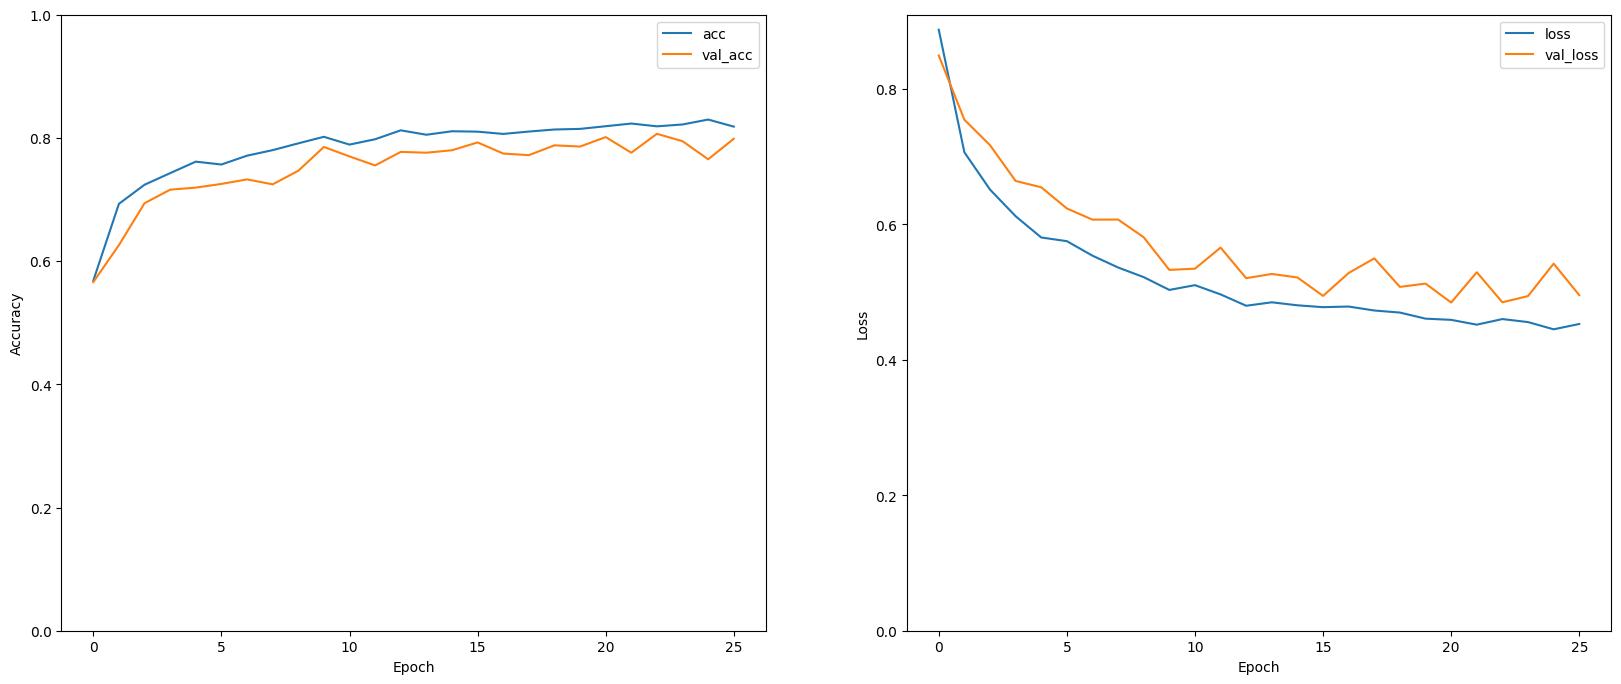

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(bottom=0)
plt.legend()

plt.show()

### fine tuning

In [ ]:
#Define freeze and unfrozen layers
for layer in MobileNet_model_230571H.layers[-30:]:
  layer.trainable=True

In [ ]:
optimizer= Adam(learning_rate=0.0001)
MobileNet_model_230571H.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = MobileNet_model_230571H.fit(train_data_gen,
                                      epochs=EPOCHS,
                                      validation_data=test_data_gen,
                                      callbacks=[early_stopping, lr_reduction])

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 117s 541ms/step - accuracy: 0.7516 - loss: 0.6279 - val_accuracy: 0.5933 - val_loss: 1.3540 - learning_rate: 1.0000e-04
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 486ms/step - accuracy: 0.8477 - loss: 0.4064 - val_accuracy: 0.8447 - val_loss: 0.4106 - learning_rate: 1.0000e-04
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 486ms/step - accuracy: 0.8628 - loss: 0.3637 - val_accuracy: 0.8247 - val_loss: 0.5096 - learning_rate: 1.0000e-04
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 485ms/step - accuracy: 0.8799 - loss: 0.3248 - val_accuracy: 0.8240 - val_loss: 0.5189 - learning_rate: 1.0000e-04
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 493ms/step - accuracy: 0.8837 - loss: 0.2953 - val_accuracy: 0.8693 - val_loss: 0.3701 - learning_rate: 5.0000e-05
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 484ms/step - accuracy: 0.9021 - loss: 0.2743 - val_accuracy: 0.8973 - val_loss: 0.2942 - learning_rate: 5.0000e-05
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━

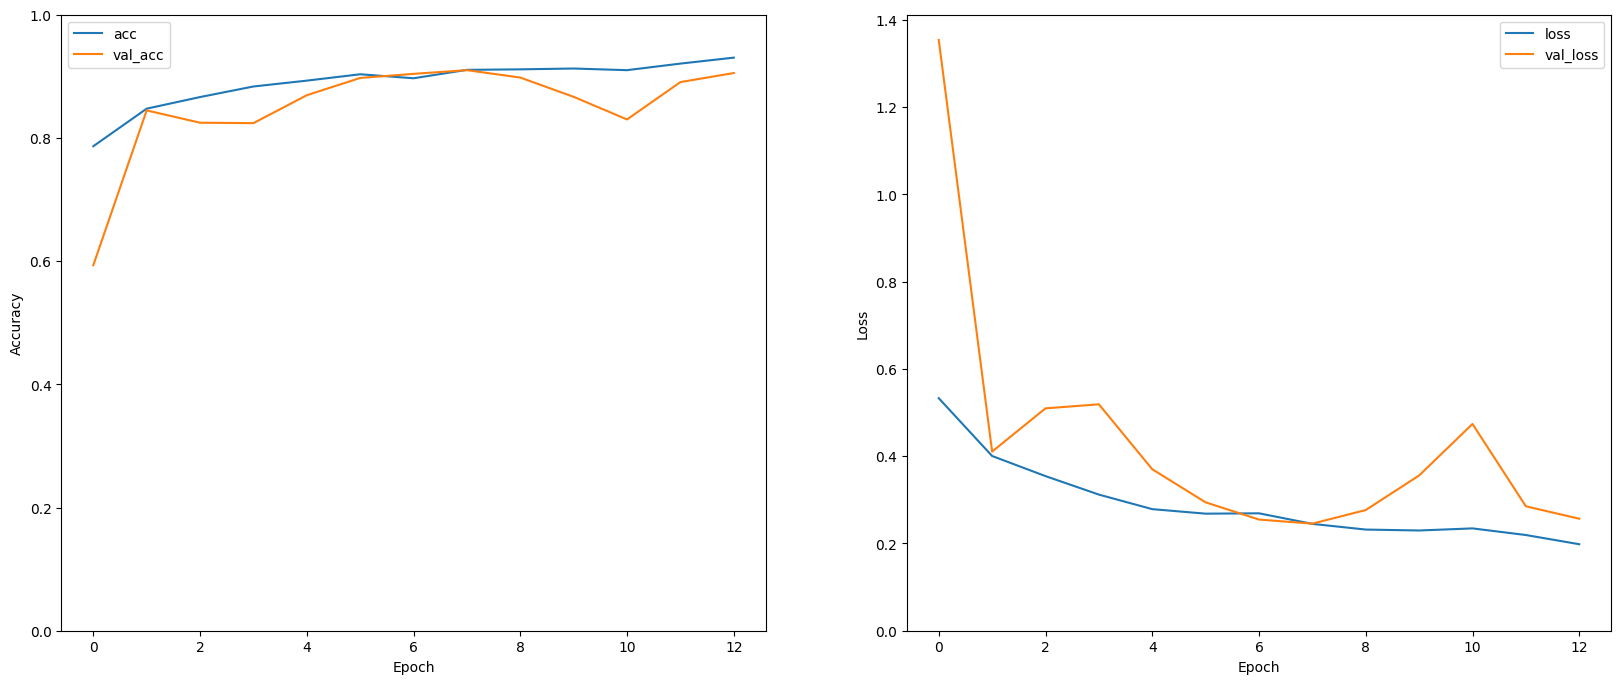

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(bottom=0)
plt.legend()

plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
import numpy
y_pred = MobileNet_model_230571H.predict(test_data_gen)
y_pred = numpy.argmax(y_pred, axis=1)
print('Classification Report')
print(classification_report(test_data_gen.classes, y_pred, target_names=class_names))

47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step
Classification Report
              precision    recall  f1-score   support

       truck       0.95      0.90      0.93       500
  automobile       0.86      0.96      0.91       500
    airplane       0.93      0.87      0.90       500

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step


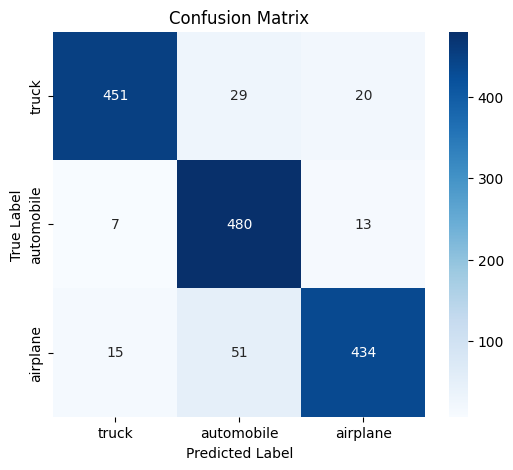

In [ ]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example data: Actual and Predicted Labels
y_true = test_data_gen.classes
y_pred = np.argmax(MobileNet_model_230571H.predict(test_data_gen), axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1
prediction= automobile


<ipython-input-50-eff949f6b9c5>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_number = int(np.random.randint(0, len(list_of_files), size=1))


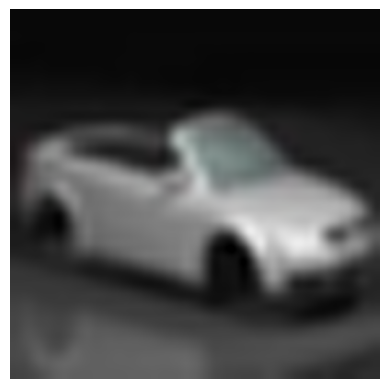

In [ ]:
# randomly choose a picture to test model

img_number = int(np.random.randint(0, len(list_of_files), size=1))
test_image = list_of_files[img_number]

new_image = load_image(test_image)

pred = MobileNet_model_230571H.predict(new_image)
print(np.argmax(pred[0]))
prediction_result = class_names[np.argmax(pred[0])]
print('prediction=', prediction_result)

img = image.load_img(test_image)  # Load without resizing
img_array = np.array(img)
# Upscale to a larger size, e.g., double the dimensions
upscaled_img = upscale_images([img_array], target_size=(512, 512))[0]

plt.figsize = (5, 5)
plt.imshow(upscaled_img)  # Display the upscaled image
plt.axis('off')
plt.show()


## ResNet50V2


In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import layers, models

In [ ]:
ResNet50V2_base_model = ResNet50V2(weights='imagenet',include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x=ResNet50V2_base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(32,activation='relu')(x)
x=Dropout(0.1)(x)
preds=Dense(3, activation='softmax')(x)

ResNet50V2_model_230571H = Model(inputs=ResNet50V2_base_model.input, outputs=preds)
ResNet50V2_model_230571H.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 64, 64, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 64, 64, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 66, 66, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,831,299 (90.91 MB)

 Trainable params: 23,785,859 (90.74 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [ ]:
for i, layer in enumerate(ResNet50V2_base_model.layers):
  print(i, layer.name)

0 input_layer_2
1 conv1_pad
2 conv1_conv
3 pool1_pad
4 pool1_pool
5 conv2_block1_preact_bn
6 conv2_block1_preact_relu
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_pad
11 conv2_block1_2_conv
12 conv2_block1_2_bn
13 conv2_block1_2_relu
14 conv2_block1_0_conv
15 conv2_block1_3_conv
16 conv2_block1_out
17 conv2_block2_preact_bn
18 conv2_block2_preact_relu
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_pad
23 conv2_block2_2_conv
24 conv2_block2_2_bn
25 conv2_block2_2_relu
26 conv2_block2_3_conv
27 conv2_block2_out
28 conv2_block3_preact_bn
29 conv2_block3_preact_relu
30 conv2_block3_1_conv
31 conv2_block3_1_bn
32 conv2_block3_1_relu
33 conv2_block3_2_pad
34 conv2_block3_2_conv
35 conv2_block3_2_bn
36 conv2_block3_2_relu
37 max_pooling2d_4
38 conv2_block3_3_conv
39 conv2_block3_out
40 conv3_block1_preact_bn
41 conv3_block1_preact_relu
42 conv3_block1_1_conv
43 conv3_block1_1_bn
44 conv3_block1_1_relu
45 conv3_block1_2

###feature extraction

In [ ]:
ResNet50V2_base_model.trainable = False

In [ ]:
optimizer = Adam(learning_rate=0.0001)
ResNet50V2_model_230571H.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = ResNet50V2_model_230571H.fit(train_data_gen,epochs=EPOCHS,validation_data=test_data_gen, callbacks=[early_stopping, lr_reduction])

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 123s 573ms/step - accuracy: 0.5329 - loss: 0.9559 - val_accuracy: 0.8693 - val_loss: 0.3921 - learning_rate: 1.0000e-04
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 485ms/step - accuracy: 0.7437 - loss: 0.6089 - val_accuracy: 0.8907 - val_loss: 0.2989 - learning_rate: 1.0000e-04
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 488ms/step - accuracy: 0.7794 - loss: 0.5410 - val_accuracy: 0.8993 - val_loss: 0.2756 - learning_rate: 1.0000e-04
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 484ms/step - accuracy: 0.7943 - loss: 0.5031 - val_accuracy: 0.9020 - val_loss: 0.2572 - learning_rate: 1.0000e-04
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 486ms/step - accuracy: 0.8131 - loss: 0.4552 - val_accuracy: 0.9087 - val_loss: 0.2435 - learning_rate: 1.0000e-04
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 488ms/step - accuracy: 0.8274 - loss: 0.4467 - val_accuracy: 0.9060 - val_loss: 0.2486 - learning_rate: 1.0000e-04
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━

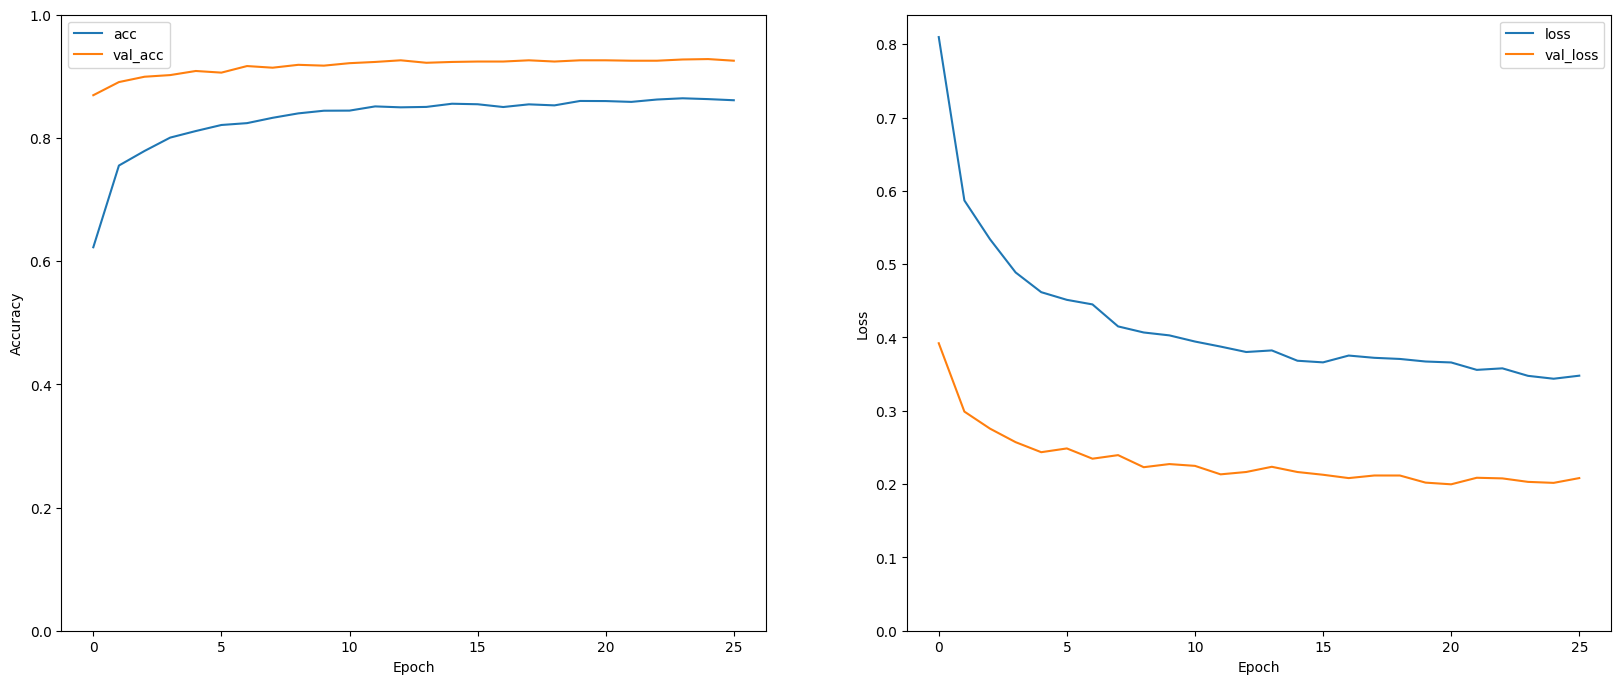

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(bottom=0)
plt.legend()

plt.show()

### fine tuning

In [ ]:
#Define freeze and unfrozen layers
for layer in ResNet50V2_model_230571H.layers[-25:]:
  layer.trainable=True

In [ ]:
ResNet50V2_model_230571H.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = ResNet50V2_model_230571H.fit(train_data_gen,epochs=EPOCHS,validation_data=test_data_gen, callbacks=[early_stopping, lr_reduction])

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 120s 546ms/step - accuracy: 0.7861 - loss: 0.5820 - val_accuracy: 0.9167 - val_loss: 0.3311 - learning_rate: 0.0010
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 488ms/step - accuracy: 0.8845 - loss: 0.3221 - val_accuracy: 0.9447 - val_loss: 0.1795 - learning_rate: 0.0010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 490ms/step - accuracy: 0.9056 - loss: 0.2637 - val_accuracy: 0.9520 - val_loss: 0.1415 - learning_rate: 0.0010
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 490ms/step - accuracy: 0.9157 - loss: 0.2364 - val_accuracy: 0.9327 - val_loss: 0.1754 - learning_rate: 0.0010
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 490ms/step - accuracy: 0.9257 - loss: 0.2166 - val_accuracy: 0.9253 - val_loss: 0.2048 - learning_rate: 0.0010
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 489ms/step - accuracy: 0.9387 - loss: 0.1727 - val_accuracy: 0.9240 - val_loss: 0.2169 - learning_rate: 5.0000e-04
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 494ms/step - a

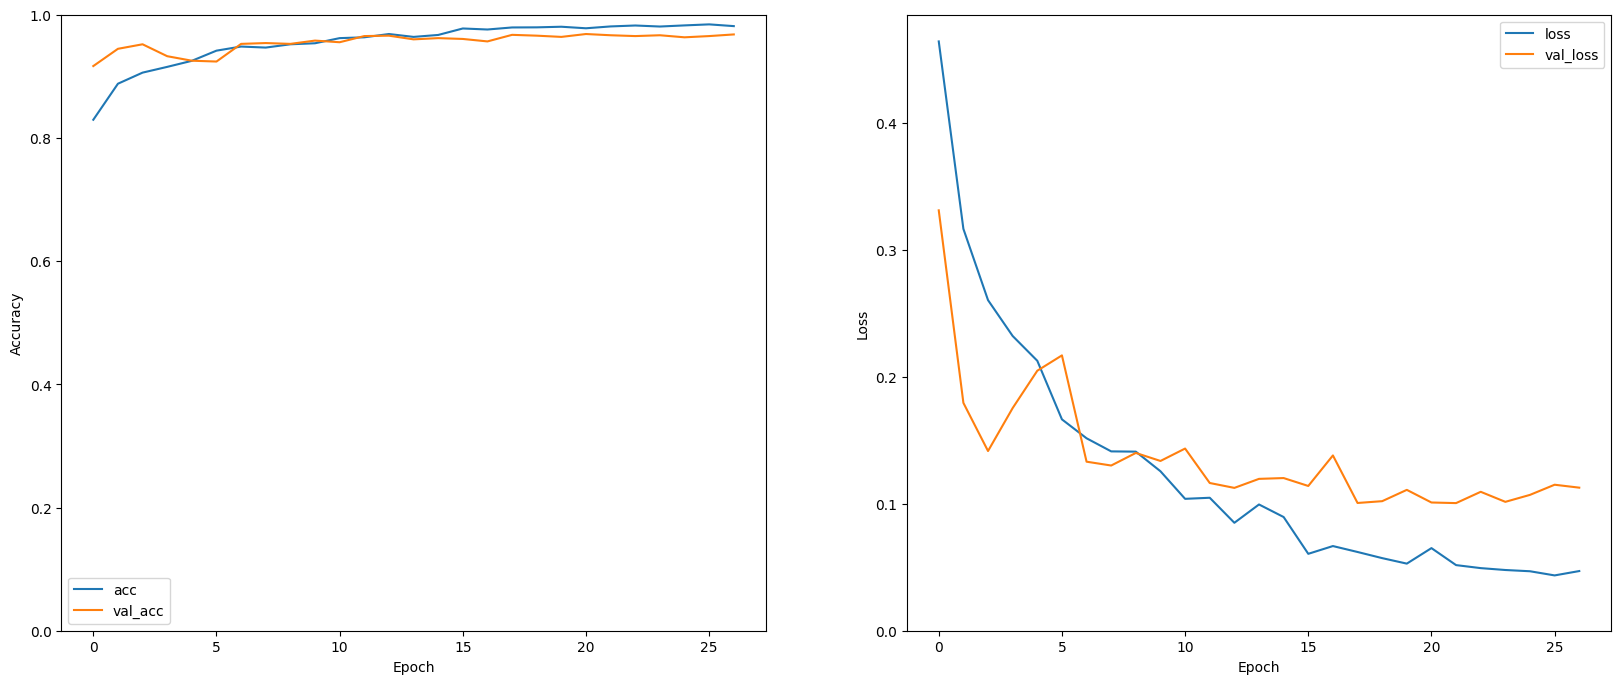

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(bottom=0)
plt.legend()

plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
import numpy
y_pred = ResNet50V2_model_230571H.predict(test_data_gen)
y_pred = numpy.argmax(y_pred, axis=1)
print('Classification Report')
print(classification_report(test_data_gen.classes, y_pred, target_names=class_names))

47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step
Classification Report
              precision    recall  f1-score   support

       truck       0.97      0.99      0.98       500
  automobile       0.95      0.97      0.96       500
    airplane       0.97      0.94      0.96       500

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step


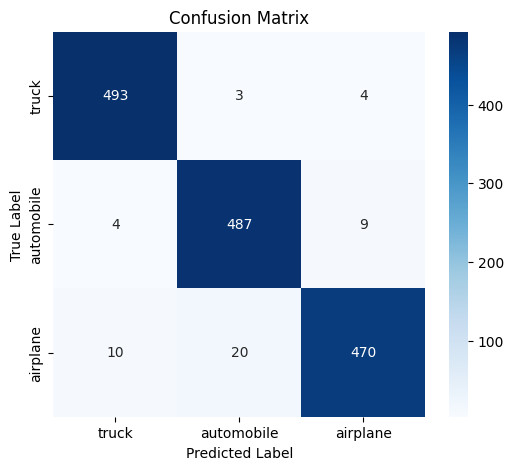

In [ ]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example data: Actual and Predicted Labels
y_true = test_data_gen.classes
y_pred = np.argmax(ResNet50V2_model_230571H.predict(test_data_gen), axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


<ipython-input-46-0e4bc6a45a90>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_number = int(np.random.randint(0, len(list_of_files), size=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[1.4745477e-08 9.9999821e-01 1.7344820e-06]
prediction= automobile


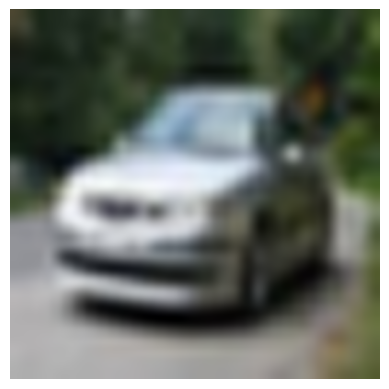

In [ ]:
# randomly choose a picture to test model

img_number = int(np.random.randint(0, len(list_of_files), size=1))
test_image = list_of_files[img_number]

new_image = load_image(test_image)

pred = ResNet50V2_model_230571H.predict(new_image)
print(pred[0])
prediction_result = class_names[np.argmax(pred[0])]
print('prediction=', prediction_result)

img = image.load_img(test_image)  # Load without resizing
img_array = np.array(img)
# Upscale to a larger size, e.g., double the dimensions
upscaled_img = upscale_images([img_array], target_size=(512, 512))[0]

plt.figsize = (5, 5)
plt.imshow(upscaled_img)  # Display the upscaled image
plt.axis('off')
plt.show()

## Summary of Transfer Learning

MobileNetV2 was initially considered for its computational efficiency. Both MobileNetV2 and ResNet50, pre-trained on ImageNet, were fine-tuned (with the last 30 layers unfrozen) and evaluated.

While earlier experiments for ResNet50V2 showed overfitting, adjustments to regularization (dropout), data augmentation (rotations, shifts, shear, zoom, flips), and the Adam optimizer (learning rate 0.0001), early stopping, and learning rate reduction, significantly improved its performance.

ResNet50V2 ultimately achieved a training accuracy of 98.25% and a validation accuracy of 96.80%, substantially outperforming MobileNetV2 (92.40% training, 90.53% validation). It also demonstrated strong generalization, with training and validation loss converging closely (training loss: 0.0455, validation loss: 0.1127).

Despite the higher computational cost, ResNet50's superior accuracy justified its selection. Initial evaluations also included VGG and Inception models, but their performance (around 0.6-0.7 accuracy) was insufficient.

This ultimately led to ResNet50V2's selection.

# Comparison of CNN and ResNet50V2

## 19-Layer CNN:


**Architecture**: Adam (3e-4), L2 (1e-5), Dropout (15%), early stopping, learning rate reduction, data augmentation, batch normalization.

**Performance**: 86.43% train, 87.20% validation accuracy.

**Pros**: Simpler architecture, faster inference.

**Cons**: Limited capacity to learn complex patterns.

**Reasoning**: Baseline model.

**Evidence**:  Results demonstrate reasonable performance but suggest limitations.

**Understanding**: incorporates fundamental CNN principles, utilizing regularization and augmentation to address overfitting and improve generalization


## ResNet50V2:


**Architecture**: Adam (1e-4), Dropout (15%), early stopping, learning rate reduction, data augmentation, batch normalization. Last 30 layers unfrozen.

**Performance**: 98.25% train, 96.80% validation accuracy.

**Pros**: Skip connections, complex feature learning.

**Cons**: Computationally expensive.

**Reasoning**: Higher accuracy potential.

**Evidence**: Higher accuracy demonstrates the advantage of ResNet50V2 for this task with limited training data.

**Understanding**: demonstrates deeper understanding of transfer learning and deep architectures. Focuses on maximising performance given available resources

## Comparison:

ResNet50V2 significantly outperformed the custom CNN, justifying the higher computational cost.
